<a href="https://colab.research.google.com/github/asabbah44/Text_Classification/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [ ]:
import pandas 
import pandas as pd
import nltk
import gensim
import seaborn 
import matplotlib 
import numpy  as np
import wordcloud
import textblob 
import spacy 
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/mydataset.csv')


df1 = pd.DataFrame(df1, columns = ['commenttext','label'])
df2 = pd.DataFrame(df2, columns = ['commenttext','label'])

df=pd.concat([df1,df2])


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

from Utility import preprocess
df["commenttext"] = df["commenttext"].apply(lambda x: x.lower())

# Clean the text
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_text(x))

# Clean numbers
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_numbers(x))

# Clean Contractions
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.replace_contractions(x))
 
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_punc(x))

# lemmatize
df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.lemmatize(x))
# remove stop word and custome word such as todo
# df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.custm_stopwords_remove(x))

number of characters present in each sentence. 

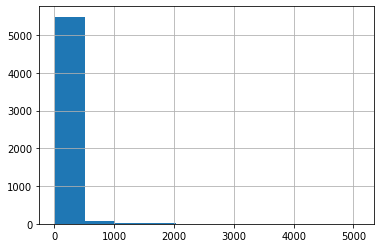

In [ ]:
df['commenttext'].str.len().hist()

number of words appearing in each comments

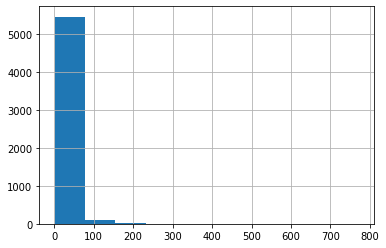

In [ ]:
df['commenttext'].str.split().\
    map(lambda x: len(x)).\
    hist()

the average word length in each sentence.

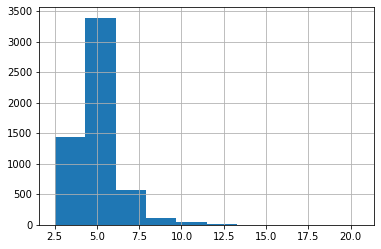

In [ ]:
df['commenttext'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

View the stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Number of stop words is : 120


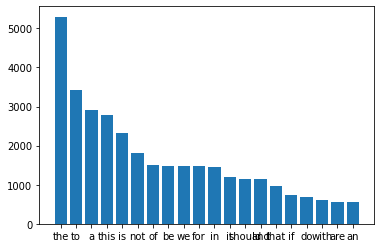

In [ ]:
stop=set(stopwords.words('english'))
corpus=[]
comment= df['commenttext'].str.split()
comments=comment.values.tolist()
corpus=[word for i in comments for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
x,y=zip(*top)
plt.bar(x,y)

print("Number of stop words is :" , len(dic))

which words other than these stopwords occur frequently.

In [ ]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

In [ ]:
#remove stop word and custome word such as todo
df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.custm_stopwords_remove(x))

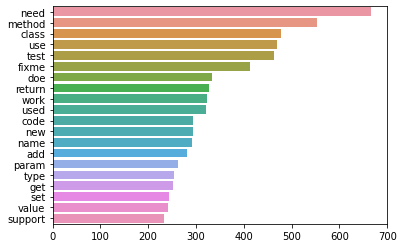

In [ ]:
corpus=[]
comment= df['commenttext'].str.split()
comments=comment.values.tolist()
corpus=[word for i in comments for word in i]
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

 n-grams 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

In [ ]:
plot_top_ngrams_barchart(df['commenttext'],2)

AttributeError: ignored

In [ ]:
plot_top_ngrams_barchart(df['commenttext'],3)

AttributeError: ignored

**Topic modeling exploration with pyLDAvis**
Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.
1) tokenize
2) remove stopwords
3) lemmatize
4) convert to the bag of words

In [ ]:
pip install pyldavis

In [ ]:
# Code Snippet for Creating LDA visualization
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
nltk.download('punkt')
nltk.download('wordnet')


def get_lda_objects(text):

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


create the bag of words model using gensim

In [ ]:
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['commenttext']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

In [ ]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

create the LDA model:

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dic,                                    
                                   passes = 5,
                                   workers = 2)
lda_model.show_topics()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

[(0,
  '0.016*"test" + 0.013*"error" + 0.010*"method" + 0.010*"exception" + 0.009*"used" + 0.008*"doe" + 0.006*"change" + 0.006*"work" + 0.005*"need" + 0.005*"message"'),
 (1,
  '0.011*"code" + 0.009*"work" + 0.009*"use" + 0.008*"need" + 0.007*"make" + 0.007*"used" + 0.006*"method" + 0.005*"new" + 0.005*"value" + 0.005*"cgi"'),
 (2,
  '0.023*"test" + 0.014*"fix" + 0.012*"value" + 0.012*"parameter" + 0.009*"type" + 0.009*"use" + 0.008*"name" + 0.008*"provide" + 0.008*"case" + 0.007*"method"'),
 (3,
  '0.023*"class" + 0.014*"support" + 0.012*"use" + 0.012*"method" + 0.012*"test" + 0.010*"need" + 0.009*"add" + 0.008*"fixme" + 0.007*"could" + 0.006*"remove"'),
 (4,
  '0.019*"component" + 0.017*"need" + 0.013*"start" + 0.012*"method" + 0.011*"stop" + 0.009*"link" + 0.009*"state" + 0.007*"set" + 0.007*"auto" + 0.007*"used"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.009160 -0.027145       1        1  21.373898
1      0.031653  0.065440       2        1  20.191647
4     -0.144212 -0.043478       3        1  19.997796
2      0.093415 -0.097620       4        1  19.800377
3      0.009984  0.102803       5        1  18.636282, topic_info=          Term        Freq       Total Category  logprob  loglift
194  component  250.000000  250.000000  Default  30.0000  30.0000
853       stop  129.000000  129.000000  Default  29.0000  29.0000
912      start  173.000000  173.000000  Default  28.0000  28.0000
63       class  424.000000  424.000000  Default  27.0000  27.0000
134      error  210.000000  210.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
304     change   45.724290  226.869967   Topic5  -5.4372   0.0783
61       added   41.674836  196.191967   Topic5  -5.5299   0.1309
28        case   42.721076  220.692648   Topic5  -5.5051   0.0380
298        get   35.256863  197.201189   Topic5  -5.6971  -0.0415
278       used   34.573615  329.584940   Topic5  -5.7167  -0.5747

[395 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
1778      2  0.050302                 abstract
1778      3  0.050302                 abstract
1778      4  0.100604                 abstract
1778      5  0.754529                 abstract
7030      4  0.842653  abstractcamelcontroller
...     ...       ...                      ...
617       1  0.648422                    wrong
617       2  0.069474                    wrong
617       3  0.023158                    wrong
617       4  0.254737                    wrong
617       5  0.023158                    wrong

[821 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])

Wordcloud

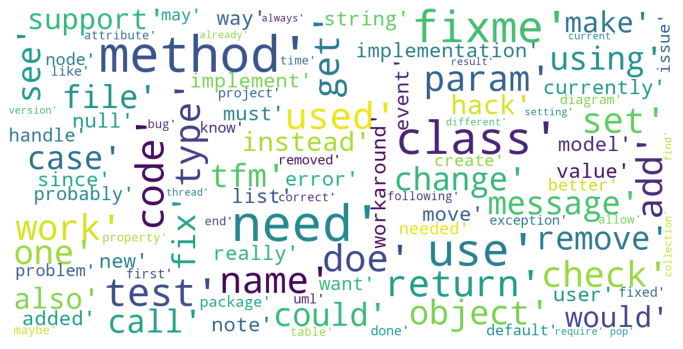

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

Sentiment analysis


In [ ]:
from textblob import TextBlob
TextBlob('This class is to complex').sentiment

Sentiment(polarity=-0.3, subjectivity=0.4)

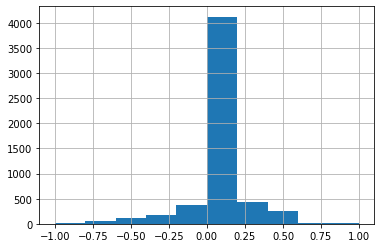

In [ ]:
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

plot_polarity_histogram(df.commenttext)    


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


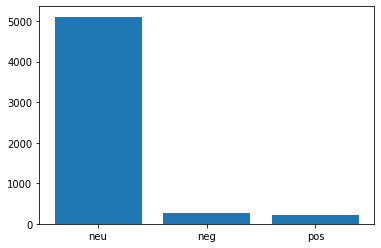

In [ ]:
plot_sentiment_barchart(df.commenttext, method='Vader')

Named entity recognition


In [ ]:

# Code Snippet for Named Entity Barchart

import spacy
from collections import  Counter
import seaborn as sns
nlp = spacy.load("en_core_web_sm")
def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

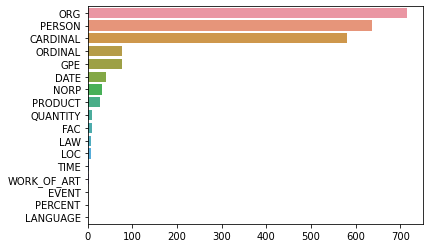

In [ ]:

plot_named_entity_barchart(df['commenttext'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


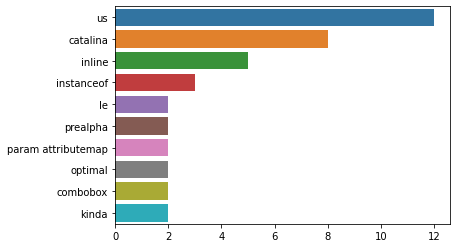

In [ ]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=df['commenttext'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


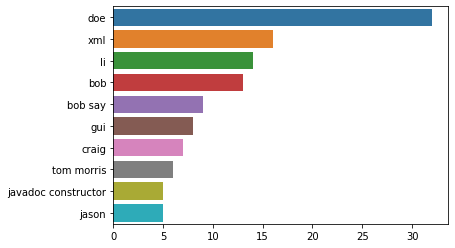

In [ ]:
per=df['commenttext'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

Exploration through parts of speach tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=df['commenttext'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


IndexError: ignored

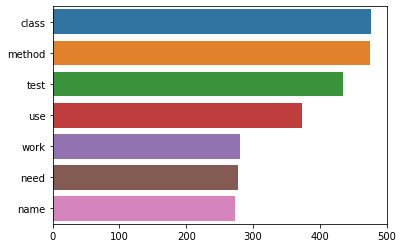

In [ ]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj


words=df['commenttext'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

Exploring through text complexity


In [ ]:
!pip install textstat

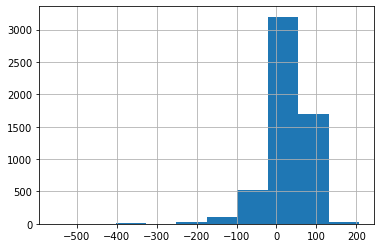

In [ ]:
import textstat
from textstat import flesch_reading_ease

df['commenttext'].\
   apply(lambda x : flesch_reading_ease(x)).hist()